In [1]:
import numpy as np
import ggseg
import pickle

from matplotlib import pyplot as plt 
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import plotly.offline as pyo

### NEW FILE

In [2]:
read_input_file = open('data/EDADS_subtype_timelines_agecorrected_opt.pickle','rb')
load_inputs = pickle.load(read_input_file)
read_input_file.close()

T, S, Sboot = load_inputs

/Users/macos/opt/anaconda3/envs/umc/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator MinCovDet from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



In [6]:
# T.biomarker_labels

# Separate Subcortical & Cortical Regions

In [7]:
def get_regions(T, hemi = False):  
    
    # List Subcortical - Aseg Atlas
    list_subcortical = ['3rd-Ventricle','4th-Ventricle','Brain-Stem','CC_Anterior','CC_Central',
                       'CC_Mid_Posterior','CC_Mid_Anterior','CC_Posterior','Cerebellum-Cortex',
                       'Cerebellum-White-Matter','Coronal','Left-Amygdala','Left-Caudate','Left-Hippocampus',
                       'Left-Lateral-Centricle','Left-Pallidum','Left-Putamen','Left-Thalamus','Left-VentralDC',
                        'Right-Amygdala','Right-Caudate','Right-Hippocampus','Right-Lateral-Ventricle',
                       'Right-Pallidum','Right-Putamen','Right-Thalamus','Right-VentralDC','Sagittal']

    labels = T.biomarker_labels

    regions_aseg = []
    for l in labels:
        if l in list_subcortical:
            regions_aseg.append(l)

    if len(regions_aseg) == 0:
        list_subcortical_clean =list_subcortical

        for l in range(len(list_subcortical)):
            list_subcortical_clean[l]=list_subcortical[l].replace('Left-','')
            list_subcortical_clean[l]=list_subcortical[l].replace('Right-','')

        list_subcortical_clean = list(set(list_subcortical))

        for l in labels:
            if l in list_subcortical_clean:
                regions_aseg.append(l)
                
    regions_dk = [l.lower() for l in labels if l not in regions_aseg]

    return regions_aseg, regions_dk


In [8]:
regions_aseg, regions_dk = get_regions(T)
print(f'Aseg: {regions_aseg}')
print(f'DK: {regions_dk}')

Aseg: ['Thalamus', 'Caudate', 'Putamen', 'Hippocampus', 'Amygdala']
DK: ['temporal_lobe', 'superior_frontal_gyrus', 'middle_frontal_gyrus', 'inferior_frontal_gyrus', 'gyrus_rectus', 'orbitofrontal_gyri', 'precentral_gyrus', 'postcentral_gyrus', 'superior_parietal_gyrus', 'inferolateral_remainder_of_parietal_lobe', 'lateral_remainder_of_occipital_lobe', 'lingual_gyrus', 'insula', 'gyrus_cinguli_anterior_part', 'gyrus_cinguli_posterior_part', 'parahippocampal_and_ambient_gyri', 'accumbens-area']


In [9]:
len(regions_dk)

17

### Mapping regions depending if hemispheres are separated or not

In [13]:
def mapping_dk(hemi = False):
    # if hemi = True, regions are mapped separately to left and right hemisphere
    
    # LEFT
    list_cortical_left = ['Temporal_lobe_left','Superior_frontal_gyrus_left',
                          'Middle_frontal_gyrus_left','Inferior_frontal_gyrus_left', 
                          'Gyrus_rectus_left','Orbitofrontal_gyri_left','Precentral_gyrus_left',
                          'Postcentral_gyrus_left','Superior_parietal_gyrus_left', 
                          'Inferolateral_remainder_of_parietal_lobe_left',
                          'Lateral_remainder_of_occipital_lobe_left','Lingual_gyrus_left', 
                          'Insula_left','Gyrus_cinguli_anterior_part_left','Gyrus_cinguli_posterior_part_left',
                          'Parahippocampal_and_ambient_gyri_left']

    org_cortical_mapping_left = [['bankssts_left','transversetemporal_left',
                                      'superiortemporal_left','temporalpole_left','entorhinal_left',
                                      'middletemporal_left','inferiortemporal_left','fusiform_left'], 
                                     ['superiorfrontal_left','frontalpole_left'], 
                                     ['caudalmiddlefrontal_left','rostralmiddlefrontal_left'], 
                                     ['parsopercularis_left','parsorbitalis_left','parstriangularis_left'], 
                                     ['medialorbitofrontal_left'], ['lateralorbitofrontal_left'], 
                                     ['precentral_left','paracentral_left'], ['postcentral_left'], 
                                     ['superiorparietal_left','precuneus_left','cuneus_left','pericalcarine_left'], 
                                 ['inferiorparietal_left','supramarginal_left'], 
                                     ['lateraloccipital_left'], 
                                     ['lingual_left'], ['insula_left'], ['caudalanteriorcingulate_left','rostralanteriorcingulate_leftvolume'], 
                                     ['posteriorcingulate_left','isthmuscingulate_left'], 
                                     ['parahippocampal_left']]
    
    # RIGHT
    list_cortical_right = ['Temporal_lobe_right','Superior_frontal_gyrus_right','Middle_frontal_gyrus_right',
                           'Inferior_frontal_gyrus_right', 'Gyrus_rectus_right','Orbitofrontal_gyri_right',
                           'Precentral_gyrus_right','Postcentral_gyrus_right','Superior_parietal_gyrus_right', 
                           'Inferolateral_remainder_of_parietal_lobe_right','Lateral_remainder_of_occipital_lobe_right',
                           'Lingual_gyrus_right', 'Insula_right','Gyrus_cinguli_anterior_part_right',
                           'Gyrus_cinguli_posterior_part_right','Parahippocampal_and_ambient_gyri_right']
    
    org_cortical_mapping_right = [['bankssts_right','transversetemporal_right',
                                  'superiortemporal_right','temporalpole_right','entorhinal_right',
                                  'middletemporal_right','inferiortemporal_right','fusiform_right'], 
                                 ['superiorfrontal_right','frontalpole_right'], 
                                 ['caudalmiddlefrontal_right','rostralmiddlefrontal_right'], 
                                 ['parsopercularis_right','parsorbitalis_right','parstriangularis_right'], 
                                 ['medialorbitofrontal_right'], ['lateralorbitofrontal_right'], 
                                 ['precentral_right','paracentral_right'], ['postcentral_right'], 
                                 ['superiorparietal_right','precuneus_right','cuneus_right','pericalcarine_right'], ['inferiorparietal_right','supramarginal_right'], 
                                 ['lateraloccipital_right'], 
                                 ['lingual_right'], ['insula_right'], ['caudalanteriorcingulate_right','rostralanteriorcingulate_right'], 
                                 ['posteriorcingulate_right','isthmuscingulate_right'], 
                                 ['parahippocampal_right']]
    
    # BOTH HEMISPHERES
    list_cortical = ['Temporal_lobe','Superior_frontal_gyrus','Middle_frontal_gyrus','Inferior_frontal_gyrus', 
                     'Gyrus_rectus','Orbitofrontal_gyri','Precentral_gyrus','Postcentral_gyrus','Superior_parietal_gyrus', 
                     'Inferolateral_remainder_of_parietal_lobe','Lateral_remainder_of_occipital_lobe',
                     'Lingual_gyrus', 'Insula','Gyrus_cinguli_anterior_part','Gyrus_cinguli_posterior_part',
                     'Parahippocampal_and_ambient_gyri']

    org_cortical_mapping = [['bankssts_left','transversetemporal_left',
                              'superiortemporal_left','temporalpole_left','entorhinal_left',
                              'middletemporal_left','inferiortemporal_left','fusiform_left','bankssts_right','transversetemporal_right',
                          'superiortemporal_right','temporalpole_right','entorhinal_right',
                          'middletemporal_right','inferiortemporal_right','fusiform_right'],                             
                         ['superiorfrontal_left','frontalpole_left','superiorfrontal_right','frontalpole_right'], 
                         ['caudalmiddlefrontal_left','rostralmiddlefrontal_left','caudalmiddlefrontal_right','rostralmiddlefrontal_right'], 
                         ['parsopercularis_left','parsorbitalis_left','parstriangularis_left','parsopercularis_right','parsorbitalis_right','parstriangularis_right'], 
                         ['medialorbitofrontal_left','medialorbitofrontal_right'], ['lateralorbitofrontal_left','lateralorbitofrontal_right'], 
                         ['precentral_left','paracentral_left','precentral_right','paracentral_right'], ['postcentral_left','postcentral_right'], 
                         ['superiorparietal_left','precuneus_left','superiorparietal_right','precuneus_right','cuneus_left','pericalcarine_left','cuneus_right','pericalcarine_right'], ['inferiorparietal_left','supramarginal_left','inferiorparietal_right','supramarginal_right'], 
                         ['lateraloccipital_left','lateraloccipital_right'],  
                         ['lingual_left','lingual_right'], ['insula_left','insula_right'], ['caudalanteriorcingulate_left','rostralanteriorcingulate_left','caudalanteriorcingulate_right','rostralanteriorcingulate_right'], 
                         ['posteriorcingulate_left','isthmuscingulate_left','posteriorcingulate_right','isthmuscingulate_right'], 
                         ['parahippocampal_left','parahippocampal_right']]

    dic = {}
    
    if hemi == False:
        for idx, i in enumerate(list_cortical):
            dic[i.lower()] = org_cortical_mapping[idx] 
            
    elif hemi == True:
        list_cortical = list_cortical_left + list_cortical_right
        list_mapping = org_cortical_mapping_left + org_cortical_mapping_right
    
        for idx, i in enumerate(list_cortical):
            dic[i.lower()] = list_mapping[idx] 
        
    return dic
    

In [14]:
mapped_dict = mapping_dk(hemi = False)
# mapped_dict

In [76]:
def dk_dict(T,S, mapped_dict, subtype_labels = None, subtype = None):
    
    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: dataframe from dk_dataframe() function
    :param S: chosen subtype
    :param mapped_dict: a dictionary with key: values --> T.biomarker_labels: list(DK-labels)
    :param subtype: name or index of the subtype from subtype_lables (optional, choses first available subtype as default)  
    :param subtype_labels: a list with names of the subtypes (optional)
    :return: dictionary with scores for each DK region for chosen subtype
    """
    
    unique_subtypes = np.unique(S['subtypes'][~np.isnan(S['subtypes'])])
    if subtype_labels is None:
        subtype_labels = {f'Subtype {i}': i for i in range(len(unique_subtypes))}
        if subtype is None:
            subtype = next(iter(subtype_labels))
    elif subtype is None:
        subtype = subtype_labels[0]  
        
        
    # clean names from capital letters
    labels = list(map(lambda x: x.lower(), T.biomarker_labels))
    labels_dict = {num: label.lower() for num, label in enumerate(labels)}
    
    order = T.sequence_model['ordering'][subtype_labels[subtype]]
    
    labels_ordered = []
    for o in order:
        labels_ordered.append(labels_dict[o])   
           
    dic = dict(zip(labels_ordered, T.sequence_model['event_centers'][subtype_labels[subtype]]))
                    
    # flat lost of dict values (single list of DK-labels)
    dk_flat = [x for v in mapped_dict.values() for x in v]
            
    #Match T.biomarker_labels to DK labels
    list_plot = list()
    for key in mapped_dict.keys():
            for item in mapped_dict[key]:
                list_plot.append(dic[key])
                    
    # Dict for dk-label: T.label value
    dic_dk = dict(zip(dk_flat, list_plot))
    
    return dic_dk

In [88]:
dk_0 = dk_dict(T, S, mapped_dict = mapped_dict)
# dk_0

In [53]:
def aseg_dict(T, S, subtype_labels = None, subtype = None, hemi = False):
    
    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: dataframe from dk_dataframe() function
    :param S: chosen subtype
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype from subtype_lables (optional, choses first available subtype as default)  
    :return: dictionary with scores for each DK region for chosen subtype
    """

    unique_subtypes = np.unique(S['subtypes'][~np.isnan(S['subtypes'])])
    if subtype_labels is None:
        subtype_labels = {f'Subtype {i}': i for i in range(len(unique_subtypes))}
        if subtype is None:
            subtype = next(iter(subtype_labels))
    elif subtype is None:
        subtype = subtype_labels[0]
    
    labels = T.biomarker_labels
    labels_dict = {num: label for num, label in enumerate(labels)}
    order = T.sequence_model['ordering'][subtype_labels[subtype]]
    
    labels_ordered = []
    for o in order:
        labels_ordered.append(labels_dict[o])    
    
    if hemi == True:
        dic_aseg = dict(zip(labels_ordered, T.sequence_model['event_centers'][subtype_labels[subtype]]))
    else:
        regions= labels_ordered*2

        for l in range(len(T.biomarker_labels)):
            regions[l]='Left-' + regions[l]
        for l in range(len(T.biomarker_labels), 2*len(T.biomarker_labels)):
            regions[l]='Right-' + regions[l]
            
        values = list(T.sequence_model['event_centers'][subtype_labels[subtype]]) + list(T.sequence_model['event_centers'][subtype_labels[subtype]])                                                                   
                        
        dic_aseg = dict(zip(regions, values))
        
        
    return dic_aseg

In [87]:
aseg_0 = aseg_dict(T,S, subtype='Subtype 0')
# aseg_0

### Combined function rerturning both plots

In [78]:
def plot_ggseg(T,S, mapped_dict, subtype_labels = None, subtype = None): 
    
    import ggseg
    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: dataframe from dk_dataframe() function
    :param S: chosen subtype
    :param mapped_dict: a dictionary with key: values --> T.biomarker_labels: list(DK-labels)
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype from subtype_lables (optional, choses first available subtype as default)  
    :return: two plots -> ggseg.plot_dk() and ggseg.plot_aseg()
    """
    
    dk = dk_dict(T, S, mapped_dict = mapped_dict, subtype = subtype)
    
    aseg = aseg_dict(T,S, subtype = subtype)
    
    if subtype is None:
        subtype = 'default = 0'

    
    ggseg.plot_dk(dk, cmap='Reds_r', figsize=(10,10),
              vminmax = [0,1],
              background='k', edgecolor='w', bordercolor='gray', title=f'Subtype: {subtype}',
                fontsize = 24)

    ggseg.plot_aseg(aseg, cmap='Reds_r', figsize=(10,10),
                vminmax = [0,1],
                background='k', edgecolor='w', bordercolor='gray', title=f'Subcortical regions for Subtype: {subtype}',
                fontsize = 24)

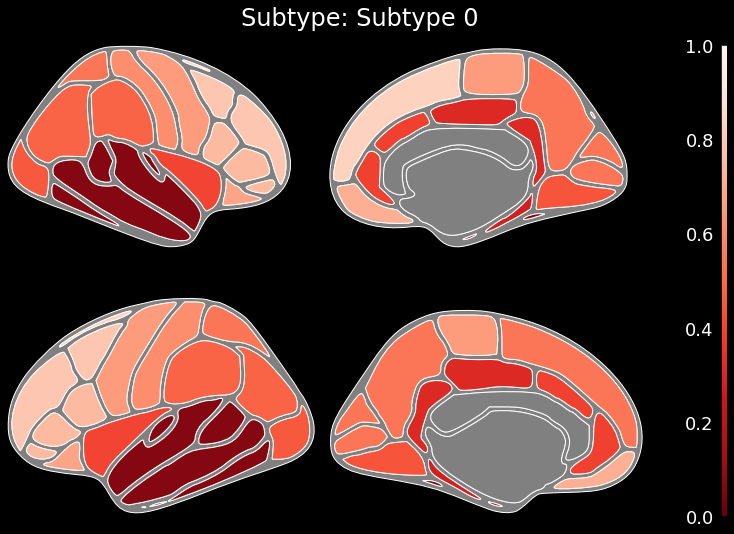

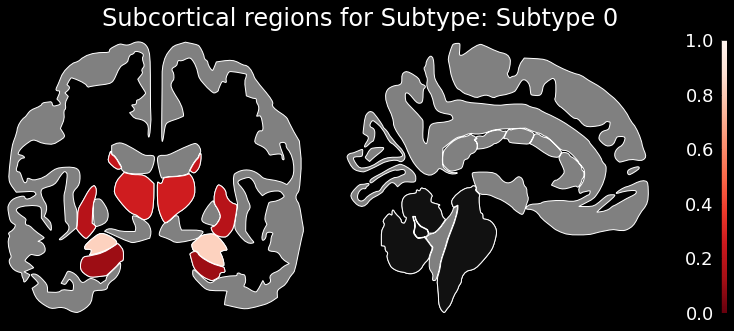

In [86]:
p = plot_ggseg(T, S, mapped_dict, subtype_labels = None, subtype = 'Subtype 0')

## Separate plots - for Streamlit App, with Slider

In [80]:
def plot_dk_atlas(T,S, subtype_labels = None, subtype = None, slider = None):     

    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: timeline object from snowphlake
    :param S: dictionary from snowphlake
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype to visualise (optional)  
    :param slider: int
    :returns a figures by plt.show() -> ggseg.plot_dk() 
    """
    
    # Change hemi when changing files
    mapped_dict = mapping_dk(hemi = False)    
    
    if slider is None:
        dk = dk_dict(T, S, mapped_dict = mapped_dict, subtype = subtype)  
    else:
        dk_ = dk_dict(T, S, mapped_dict = mapped_dict, subtype = subtype)
        dk = {k: v for k, v in dk_.items() if v <= slider}
        
    
    if subtype is None:
        # subtype = 'default = 0'
        pass
    else:
        return ggseg.plot_dk(dk, cmap='Reds_r', figsize=(6,6),
                  vminmax = [0,1],
                  background='black', edgecolor='white', bordercolor='gray', title=f'{subtype}',fontsize = 24)


def plot_aseg_atlas(T,S, subtype_labels = None, subtype = None, slider = None):     

    """
    Creates a dictionary, which can be used as input to ggseg.plot_aseg() function
    :param T: timeline object from snowphlake
    :param S: dictionary from snowphlake
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype to visualise (optional)  
    :param slider: int
    :returns a figures by plt.show() -> ggseg.plot_aseg()
    """
    if slider is None:  
        aseg = aseg_dict(T,S, subtype = subtype)
    else:
        aseg_ = aseg_dict(T,S, subtype = subtype)
        aseg = {k: v for k, v in aseg_.items() if v <= slider}

    if subtype is None:
        # subtype = 'Subtype 0'
        pass 
    else:
        return ggseg.plot_aseg(aseg, cmap='Reds_r', figsize=(6,6),
                vminmax = [0,1],
                background='black', edgecolor='white', bordercolor='gray', title=f'{subtype}', fontsize = 18)

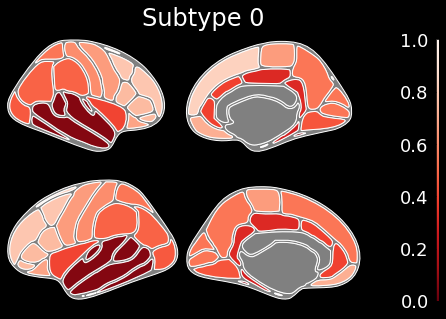

In [81]:
plot_dk_atlas(T = T, S = S, subtype = 'Subtype 0', slider = 1)  

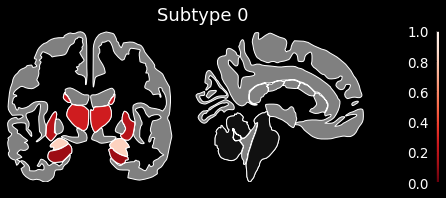

In [82]:
plot_aseg_atlas(T = T, S = S, subtype = 'Subtype 0', slider = 25)  